In [32]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import tensorflow as tf
import torch

In [35]:
classes = ['grabbing',
'grip',
'holy',
'point',
'call',
'three3',
'timeout',
'xsign',
'hand_heart',
'hand_heart2',
'little_finger',
'middle_finger',
'take_picture',
'dislike',
'fist',
'four',
'like',
'mute',
'ok',
'one',
'palm',
'peace',
'peace_inverted',
'rock',
'stop',
'stop_inverted',
'three',
'three2',
'two_up',
'two_up_inverted',
'three_gun',
'thumb_index',
'thumb_index2',
'no_gesture']

In [38]:
from ultralytics import YOLO
model = YOLO('YOLOv10n_gestures.pt') # do wczytania architektury modelu

read = torch.load('YOLOv10n_gestures.pt', map_location=torch.device('cpu'), weights_only=False )
model = read["model"]
model.eval()  # Set the model to evaluation mode

image = cv2.imread('data/data2.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (480, 640))
input = image/ 255
input = input.transpose((2, 0, 1))
input = torch.tensor(input, dtype=torch.float16).unsqueeze(0)  # Add batch dimension

with torch.no_grad():  # Disable gradient computation
    predictions = model(input)


2
195.5 301.25 277.75 371.5
115.875 552.5 160.75 614.5


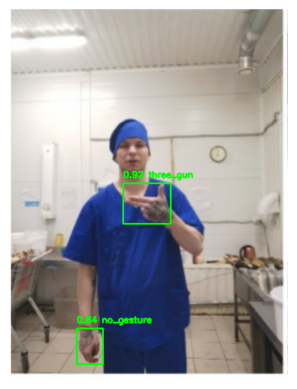

In [ ]:
# Extract predictions: shape is (1, 300, 6), the last dim is [x1, y1, x2, y2, confidence, class_id]
boxes = predictions[0][:, :, :4]  # Bounding box coordinates (x1, y1, x2, y2)
scores = predictions[0][:, :, 4]  # Confidence scores (objectness)
labels = predictions[0][:, :, 5]  # Class labels


# Filter out low-confidence predictions
conf_threshold = 0.8
mask = scores > conf_threshold
filtered_boxes = boxes[mask]
filtered_scores = scores[mask]
filtered_labels = labels[mask]

print(len(filtered_boxes))

# Draw bounding boxes on the image
for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x1, y1, x2, y2 = box.tolist()  # Convert tensor to list for coordinates
    print(x1, y1, x2, y2)
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)  # Green bounding box
    cv2.putText(image, f'{score:.2f} {classes[int(label.item())]} ', (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()


In [19]:
model = YOLO('YOLOv10n_gestures.pt')
results = model('data/my_ok.jpg')
results[0].show()


image 1/1 /home/anna/code/gesture_recognition/data/my_ok.jpg: 480x640 1 ok, 110.1ms
Speed: 1.4ms preprocess, 110.1ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)


In [3]:
# Export the model to TFLite format
model.export(format="tflite", int8=True)


image 1/1 /home/anna/code/gesture_recognition/data2.png: 640x480 1 three_gun, 1 no_gesture, 80.2ms
Speed: 2.3ms preprocess, 80.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)
Ultralytics 8.3.94 🚀 Python-3.10.16 torch-2.6.0+cu124 CPU (13th Gen Intel Core(TM) i7-13700H)
WARNING ⚠️ INT8 export requires a missing 'data' arg for calibration. Using default 'data=coco8.yaml'.

PyTorch: starting from 'YOLOv10n_gestures.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (21.4 MB)
requirements: Ultralytics requirement ['tensorflow>=2.0.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 MB 10.8 MB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 11.9 MB/s eta 0:00:0031m12.0 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 11.4 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━

E0000 00:00:1742479836.047211  858371 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742479836.052518  858371 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742479836.067008  858371 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742479836.067039  858371 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742479836.067041  858371 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742479836.067043  858371 computation_placer.cc:177] computation placer already registered. Please check linka

requirements: Ultralytics requirements ['tf_keras', 'sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0', 'onnx>=1.12.0', 'onnx2tf>=1.26.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 11.7 MB/s eta 0:00:0031m12.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 11.5 MB/s eta 0:00:0031m11.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 8.5 MB/s eta 0:00:000:00:010:00:01:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 11.2 MB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Succes

100%|██████████| 1.11M/1.11M [00:00<00:00, 7.90MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /home/anna/code/gesture_recognition/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 37.51file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 1.8s, saved as 'YOLOv10n_gestures.onnx' (9.0 MB)
TensorFlow SavedModel: collecting INT8 calibration images from 'data=coco8.yaml'

Dataset 'coco8.yaml' images not found ⚠️, missing path '/home/anna/code/2_detect_litter_multispectral/src/datasets/coco8/images/val'


100%|██████████| 433k/433k [00:00<00:00, 5.32MB/s]
Unzipping /home/anna/code/2_detect_litter_multispectral/src/datasets/coco8.zip to /home/anna/code/2_detect_litter_multispectral/src/datasets/coco8...: 100%|██████████| 25/25 [00:00<00:00, 1231.91file/s]

Dataset download success ✅ (1.1s), saved to /home/anna/code/2_detect_litter_multispectral/src/datasets




Scanning /home/anna/code/2_detect_litter_multispectral/src/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 5767.35it/s]

New cache created: /home/anna/code/2_detect_litter_multispectral/src/datasets/coco8/labels/val.cache
TensorFlow SavedModel: WARNING ⚠️ >300 images recommended for INT8 calibration, found 4 images.


TensorFlow SavedModel: starting TFLite export with onnx2tf 1.27.0...
Saved artifact at 'YOLOv10n_gestures_saved_model'. The following endpoints are available:

* Endpoint 'serving_default'
  inputs_0 (POSITIONAL_ONLY): TensorSpec(shape=(1, 640, 640, 3), dtype=tf.float32, name='images')
Output Type:
  TensorSpec(shape=(1, 300, 6), dtype=tf.float32, name=None)
Captures:
  139796753543968: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  139796753543616: TensorSpec(shape=(3, 3, 3, 16), dtype=tf.float32, name=None)
  139796753796080: TensorSpec(shape=(16,), dtype=tf.float32, name=None)
  139796754162512: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  139796754161808: TensorSpec(shape=(3, 3, 16, 32), dtype=tf.float32, name=None)
  139796743742112: TensorSpec(shape=(32,), dtype=tf.float32, name=None)
  139796743968144: TensorSpec(shape=(1, 1, 32, 32), dtype=tf.float32, name=None)
  139796743967088: TensorSpec(shape=(32,), dtype=tf.float32, name=None)
  139796744267104: TensorSpec

I0000 00:00:1742479897.746681  858371 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
I0000 00:00:1742479897.746852  858371 single_machine.cc:374] Starting new session
W0000 00:00:1742479898.454899  858371 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1742479898.454916  858371 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1742479900.367284  858371 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
I0000 00:00:1742479900.367376  858371 single_machine.cc:374] Starting new session
W0000 00:00:1742479900.911924  858371 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1742479900.911941  858371 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1742479902.916762  858371 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
I0000 00:00:1742479902.916851  858371 single_machine.cc:374] 

W0000 00:00:1742479906.247311  858371 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1742479906.247334  858371 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1742479906.286676  858371 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
fully_quantize: 0, inference_type: 6, input_inference_type: FLOAT32, output_inference_type: FLOAT32
W0000 00:00:1742479914.407770  858371 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1742479914.407792  858371 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
fully_quantize: 0, inference_type: 6, input_inference_type: INT8, output_inference_type: INT8
W0000 00:00:1742479923.178811  858371 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1742479923.178827  858371 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
W0000 00:00:1742479932.001279  858371 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_for

TensorFlow SavedModel: export success ✅ 190.6s, saved as 'YOLOv10n_gestures_saved_model' (80.3 MB)

TensorFlow Lite: starting export with tensorflow 2.19.0...
TensorFlow Lite: export success ✅ 0.0s, saved as 'YOLOv10n_gestures_saved_model/YOLOv10n_gestures_int8.tflite' (3.0 MB)

Export complete (190.9s)
Results saved to /home/anna/code/gesture_recognition
Predict:         yolo predict task=detect model=YOLOv10n_gestures_saved_model/YOLOv10n_gestures_int8.tflite imgsz=640 int8 
Validate:        yolo val task=detect model=YOLOv10n_gestures_saved_model/YOLOv10n_gestures_int8.tflite imgsz=640 data=/home/jovyan/shares/SR003.nfs2/nuzhdin/hagrid_exps/yolov10/ultralytics/cfg/datasets/hagrid_v2_gestures.yaml int8 
Visualize:       https://netron.app


'YOLOv10n_gestures_saved_model/YOLOv10n_gestures_int8.tflite'